In [10]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import seaborn as sns

In [11]:
performance_df = pd.read_csv("data/student_performance.csv", index_col=0)
performance_df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


In [12]:
test_df = pd.read_csv("data/test_scores.csv", index_col=0)
test_df.head()

,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
school,,,,,,,,,,
ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [51]:
performance_df.groupby("parental level of education")['math percentage', 'reading score percentage', 'writing score percentage'].count().sort_values(by=['math percentage'], ascending=False)

/var/folders/fq/tfk0nhl51mqg7vv9rwk8l3bc0000gn/T/ipykernel_4503/1052798071.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  performance_df.groupby("parental level of education")['math percentage', 'reading score percentage', 'writing score percentage'].count().sort_values(by=['math percentage'], ascending=False)


,math percentage,reading score percentage,writing score percentage
parental level of education,,,
some college,226,226,226
associate's degree,222,222,222
high school,196,196,196
some high school,179,179,179
bachelor's degree,118,118,118
master's degree,59,59,59


In [41]:
performance_df.groupby("parental level of education").mean()

,math percentage,reading score percentage,writing score percentage
parental level of education,,,
associate's degree,0.678829,0.709279,0.698964
bachelor's degree,0.693898,0.730000,0.733814
high school,0.621378,0.647041,0.624490
master's degree,0.697458,0.753729,0.756780
some college,0.671283,0.694602,0.688407
some high school,0.634972,0.669385,0.648883


In [42]:
performance_df.groupby("parental level of education").median()

,math percentage,reading score percentage,writing score percentage
parental level of education,,,
associate's degree,0.670,0.725,0.705
bachelor's degree,0.680,0.730,0.740
high school,0.630,0.660,0.640
master's degree,0.730,0.760,0.750
some college,0.675,0.705,0.700
some high school,0.650,0.670,0.660


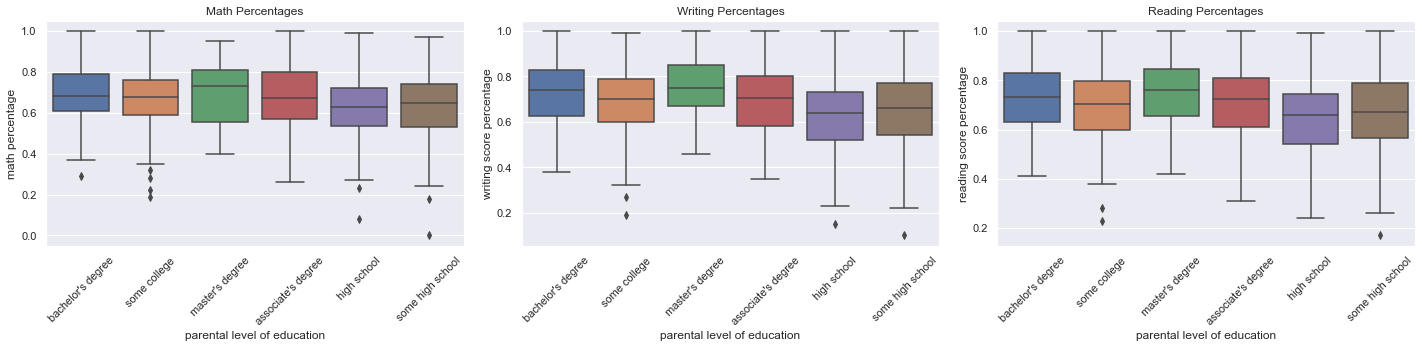

In [37]:
plt.rcParams["figure.figsize"] = [20.00, 5.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
math = sns.boxplot(x='parental level of education', y= 'math percentage', data = performance_df, ax=axes[0])
plt.setp(math.get_xticklabels(), rotation=45)
math.set_title("Math Percentages")
writing = sns.boxplot(x='parental level of education', y= 'writing score percentage', data = performance_df, ax=axes[1])
plt.setp(writing.get_xticklabels(), rotation=45)
writing.set_title("Writing Percentages")
reading = sns.boxplot(x='parental level of education', y= 'reading score percentage', data = performance_df, ax=axes[2])
plt.setp(reading.get_xticklabels(), rotation=45)
reading.set_title("Reading Percentages")
plt.show()

In [15]:
test_df.groupby("school_type").mean()

,n_student,pretest,posttest
school_type,,,
Non-public,18.869328,63.254083,75.961887
Public,24.164349,52.065740,64.016435


In [6]:
test_df.groupby("lunch").mean()

,n_student,pretest,posttest
lunch,,,
Does not qualify,21.447737,62.292181,74.375309
Qualifies for reduced/free lunch,24.581699,45.246187,57.476035


In [7]:
performance_df.groupby("lunch").mean()

,math percentage,reading score percentage,writing score percentage
lunch,,,
free/reduced,0.589211,0.646535,0.630225
standard,0.700341,0.716543,0.708233
